<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A20_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import cohen_kappa_score as kap
from sklearn.metrics import accuracy_score as oa
from sklearn.metrics import classification_report as cp
from sklearn.metrics import roc_auc_score as rocauc
from sklearn.metrics import precision_recall_curve as pr 
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler

Task 1: Subset out the following columns from the dataset: “species”,
“bill_length_mm”, “bill_depth_mm”, “flipper_length_mm”, “body_mass_g”, and
“sex”. In the models, “species” is the dependent variable and should be treated as
nominal data. All predictor variables are continuous other than “sex”, which should be
treated as a nominal variable. Remove any rows that have missing data in any column.

In [ ]:
#task1
pen=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/penguins.csv")
pen.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
pen=pen[['species', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g', 'sex']]
pen = pen.dropna(axis=0)
pen

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
4,Adelie,36.7,19.3,193.0,3450.0,female
5,Adelie,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,male
340,Chinstrap,43.5,18.1,202.0,3400.0,female
341,Chinstrap,49.6,18.2,193.0,3775.0,male
342,Chinstrap,50.8,19.0,210.0,4100.0,male


Task 2: Generate grouped box plots to show the distribution of each continuous
predictor variable within each species. Also, differentiate the data by sex within each
species. Based on these visualizations, do the penguin species appear to have different
characteristics? Do characteristics vary by sex, indicating that sex should be included as
2
a predictor variable? What variables seem most predictive? Generally, do you anticipate
being able to separate the species with high accuracy?

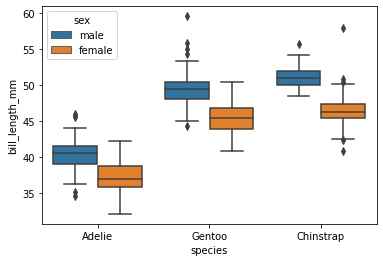

In [ ]:
#Task2 
sns.boxplot(x="species", y="bill_length_mm", hue= "sex",data=pen)

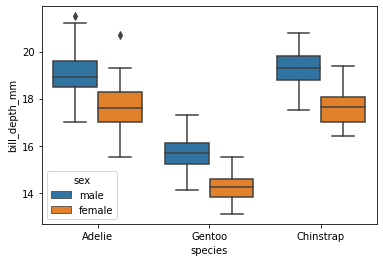

In [ ]:
sns.boxplot(x="species", y="bill_depth_mm", hue= "sex",data=pen)

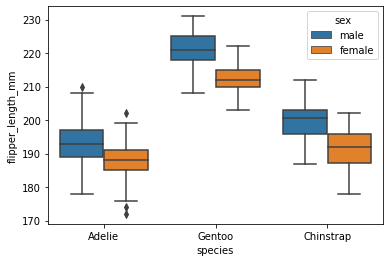

In [ ]:
sns.boxplot(x="species", y="flipper_length_mm", hue= "sex",data=pen)

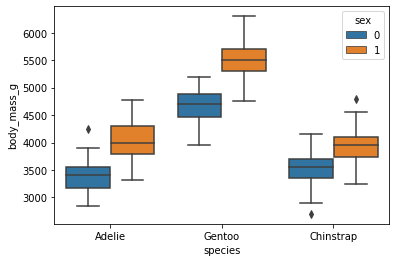

In [ ]:
sns.boxplot(x="species", y="body_mass_g", hue= "sex",data=pen)

According from the boxplots, we can indicate that there are some clear diffrences between different penguin species. Sex does also provide slight differences within each species but does not vary too much between male and female, and the male penguin do generally have higher number in all variables regardless the species. All variables kind of share simular predicability therefore I don't have strong confidence in separate the species with super good accuracy. If I have to choose one variable then I'd say bodymass could be more predictive. 

Task 3. Split the data into separate training and testing sets stratified by the species
type. 

In [ ]:
#Task3
psex= pd.get_dummies(pen.sex, drop_first= True)
x= pen[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g', 'sex']]
y= pen[['species']]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.33, stratify= y.species, random_state= 42)


Task 4. Center and scale all the continuous predictor variables. This is required for
using the Support Vector Machine and k-Nearest Neighbor algorithms. Also, create
dummy variables from the “sex” variable. 

In [ ]:
#Task4
psex= pd.get_dummies(pen.sex, drop_first= True)
min_max_scaler=MinMaxScaler()
x_train_minmax= min_max_scaler.fit_transform(x_train)
x_train_minmax

array([[0.47126437, 0.13580247, 0.79661017, 0.52941176, 0.        ],
       [0.06130268, 0.77777778, 0.3559322 , 0.38235294, 1.        ],
       [0.73563218, 0.82716049, 0.42372881, 0.24264706, 1.        ],
       ...,
       [0.16091954, 0.35802469, 0.18644068, 0.05147059, 0.        ],
       [0.44444444, 0.16049383, 0.6440678 , 0.44117647, 0.        ],
       [0.        , 0.72839506, 0.30508475, 0.20588235, 0.        ]])

In [ ]:
x_test_minmax=min_max_scaler.transform(x_test)

Task 5. Use the training partition to train Random Forest, Support Vector Machine, and
k-Nearest Neighbor models. For Random Forest, use 100 trees and set the number of
predictor variables available for splitting at each node hyperparameter to 3. Support
Vector Machines can use the default hyperparameters. For k-Nearest Neighbor, set the
number of neighbors to 11. Note that it would be best to tune the hyperparameters to
offer a fairer comparison of the algorithms. However, we are not asking you to do so
here to save time.

In [ ]:
#Task5

rf=RandomForestClassifier(n_estimators=100, max_features=3)
knn= KNeighborsClassifier(n_neighbors=11)
svm=SVC()

In [ ]:
rfpen=rf.fit(x_train_minmax,y_train)
knnpen=knn.fit(x_train_minmax,y_train)
svmpen=rf.fit(x_train_minmax,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Task 6.Use the train models to predict to the withheld validation data. Use the results
to create Confusion Matrices and the Overall Accuracy metrics. Discuss your results.
How do the algorithms compare for this specific problem? Were the species generally
separated with high or low accuracy?

In [ ]:
#Task6 #use previous train models to predict 
predrf=rfpen.predict(x_test_minmax)
predknn=knnpen.predict(x_test_minmax)
predsvm=svmpen.predict(x_test_minmax)
#create confuision matrix and overall accuracy
#Confusion matrix
print(cm(y_test, predrf))
print(cm(y_test, predknn))
print(cm(y_test, predsvm))

[[47  1  0]
 [ 0 23  0]
 [ 0  1 38]]
[[48  0  0]
 [ 1 22  0]
 [ 0  0 39]]
[[47  1  0]
 [ 0 23  0]
 [ 0  1 38]]


In [ ]:
#overall accuracy
print(oa(y_test, predrf))
print(oa(y_test, predknn))
print(oa(y_test, predsvm))

0.9818181818181818
0.990909090909091
0.9818181818181818


The overall accuracy resutls are all very high for all three algorithm models, which are close to 0.98, 0.99 and 0.98 for random forestr, knearest neighbors and Support Vector Machines. Those are all very good scores as they are extreamly close to 1, which kind of made me doubt the accuracy of the model. And becuase they are high with the overall accuracy with all three models , I beleive the specices are separated with high accuracy as well. This also exlpains in the previous boxplots with all different variables for the three penguin species since they are all relativly close results among the speceis. Therefore a high accuracy should be able to separate the species 

Task 7. Repeat the algorithm comparison. However, this time only use the
“body_mass_g” as a predictor variable. How do the three algorithms compare if only
one predictor variable is provided? How does the performance using only one predictor
variable compare to that obtained when using the entire set of predictors? 

In [ ]:
#Task7 
rf=RandomForestClassifier(n_estimators=100, max_features=1)
knn= KNeighborsClassifier(n_neighbors=11)
svm=SVC()
x_train2 = np.array([x_train_minmax[:,3]])

rf2= rf.fit(x_train2.reshape(223,1), y_train)
knn2=knn.fit(x_train2.reshape(223,1), y_train)
svm2=rf.fit(x_train2.reshape(223,1), y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [ ]:
pred_rf=rf2.predict(x_test_minmax[:,3].reshape(110,1))
pred_knn=knn2.predict(x_test_minmax[:,3].reshape(110,1))
pred_svm=svm2.predict(x_test_minmax[:,3].reshape(110,1))
#OA
print(oa(y_test, pred_rf))
print(oa(y_test, pred_knn))
print(oa(y_test, pred_svm))

0.7090909090909091
0.6727272727272727
0.7090909090909091


In [ ]:
#CM
print(cm(y_test, pred_rf))
print(cm(y_test, pred_knn))
print(cm(y_test, pred_svm))

[[35  5  8]
 [15  7  1]
 [ 3  0 36]]
[[38  3  7]
 [22  0  1]
 [ 3  0 36]]
[[35  5  8]
 [15  7  1]
 [ 3  0 36]]


The result of only using one predictor variable is quite obvious comparing to the centered and scaled all predictor variables. The one predicotr variable does not produce results as accurate as the min max scaled results. The scaled all continuous predictor variables have overall accuracy around 0.98 and 0.99, while the body mass predictor only has overall accuracy socre of 0.7. Therefore this clear difference indicate that entire set of predictors could provide better results than just one predictor. 